# Homework 4: Data Visualization
- **Name**:  Fathima Sharsoom
- **UB Username**: fsharsoo
- **UB Person Number**: 50542224

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [25]:
#imported matplot and pandas
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

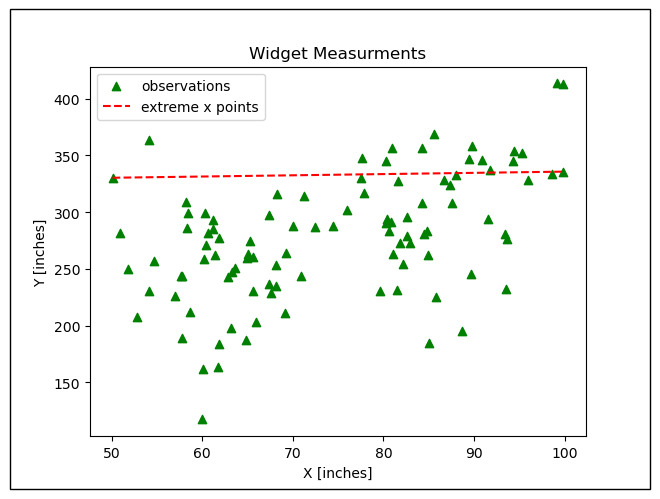

In [11]:
#set the data to d0
d0 = pd.read_csv("scatter_data.csv", comment="%", delimiter="\t", header=None)

#to split and assign x and y as the column names
d0 = d0[0].str.split(',', expand=True)
d0.columns = ["x", "y"]

#converting x and y to numeric data
d0["x"] = pd.to_numeric(d0["x"])
d0["y"] = pd.to_numeric(d0["y"])

#plotting 
plt.scatter(d0["x"], d0["y"], marker="^", color="green", label="observations")
min_x = d0["x"].min()
max_x = d0["x"].max()
y_min_x = d0.loc[d0["x"] == min_x, "y"].values[0]
y_max_x = d0.loc[d0["x"] == max_x, "y"].values[0]
plt.plot([min_x, max_x], [y_min_x, y_max_x], color="red", linestyle="--", label="extreme x points")
fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])
# Set plot title and axis labels
plt.title("Widget Measurements")
plt.xlabel("X [inches]")
plt.ylabel("Y [inches]")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Problem 2 - Histogram

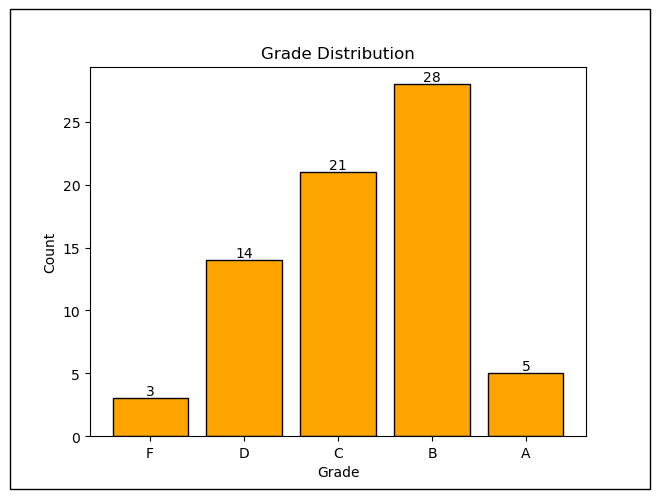

In [27]:
import numpy as np

#set data to d1
d1 = pd.read_csv('student_grades.csv', comment='%')
scores = []
with open("student_grades.csv") as f:
    for line in f:
        if not line.startswith("%"):
            x, y = line.split(",")
            scores.append(float(y))
#print(d1)
#to select second column in the dataframe
#assigning bins and grades
bins = [0, 60, 70, 80, 90, 100]
grades = ['F', 'D', 'C', 'B', 'A']

hist, bin_edges = np.histogram(scores, bins=bins)

#plotting
plt.bar(grades, hist, color='orange', edgecolor='black')
for i, count in enumerate(hist):
    plt.text(grades[i], count, str(count), ha='center', va='bottom')
fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


### Problem 3 - Barplot and Boxplot in the Same Figure

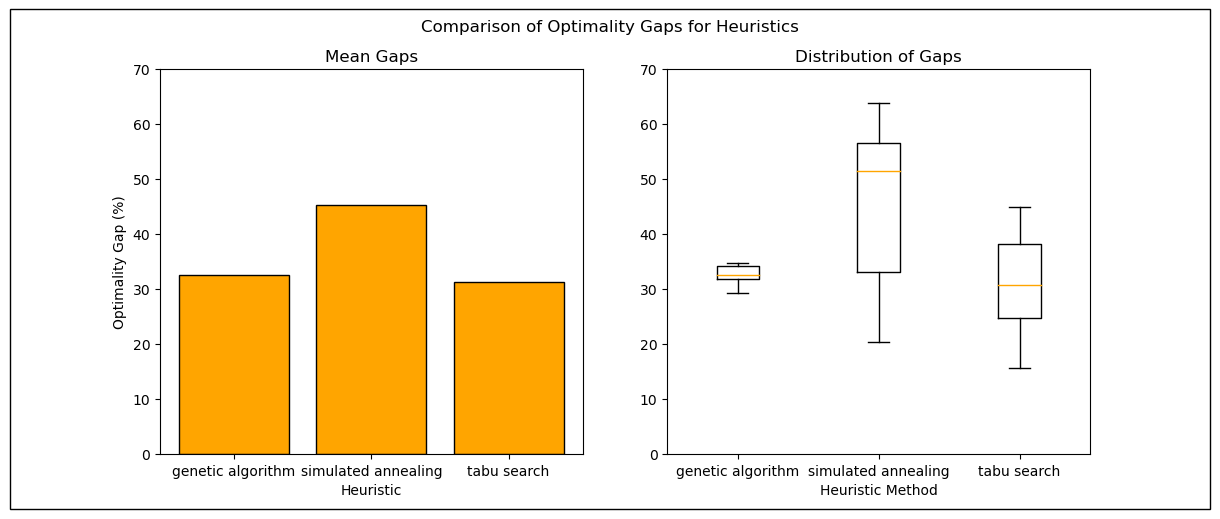

In [28]:
import numpy as np
data = pd.read_csv('solution_data.csv', comment='%', header=None)
col_names = ['Problem', 'SolnMethod', 'Value']
data = pd.DataFrame(data)
data.columns = col_names

optimal_data = data[data['SolnMethod'] == 'optimal']
optimal_ofv = optimal_data.groupby('Problem')['Value'].mean()
heuristic_data = data[data['SolnMethod'] != 'optimal']
heuristic_ofv = heuristic_data.groupby(['Problem', 'SolnMethod'])['Value'].mean()
avg_gaps = ((optimal_ofv - heuristic_ofv) / optimal_ofv) * 100

avg_gaps = avg_gaps.reset_index()
#print(Gaps)

barplot_data = pd.DataFrame({
    'Heuristic': avg_gaps['SolnMethod'],
    'Optimality Gap': avg_gaps['Value']
})


avg_gaps = avg_gaps.reset_index()
heuristics_to_select = ['genetic algorithm', 'simulated annealing', 'tabu search']
heuristic_gaps = barplot_data[barplot_data['Heuristic'].isin(heuristics_to_select)]
heuristic_gaps= heuristic_gaps.groupby('Heuristic')['Optimality Gap'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

axes[0].bar(heuristic_gaps['Heuristic'], heuristic_gaps['Optimality Gap'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")
axes[0].set_ylim([0, 70])

boxplot_data = [avg_gaps[avg_gaps['SolnMethod'] == method]['Value'] for method in avg_gaps['SolnMethod'].unique()]

boxplot = axes[1].boxplot(boxplot_data, patch_artist=False, medianprops={'color': 'orange'})
labels = avg_gaps['SolnMethod'].unique()
x = range(1,len(labels)+1)
axes[1].set_xticks(x)

axes[1].set_xticklabels(labels, rotation=0, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Distribution of Gaps")

axes[1].set_ylim([0, 70])
axes[1].set_ylim(axes[0].get_ylim())

fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])

plt.show()

--- 
## Part 2 - Explore New Plot Types

This breast cancer patient dataset was collected from the NCI's SEER Program's November 2017 update, which provides information on population-based cancer statistics. The provided plot represents an analysis of cancer patients' survival in terms of both age, cancer stage, and survival time in months.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/joint_kde.html
- **URL of Sample Data**:  https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

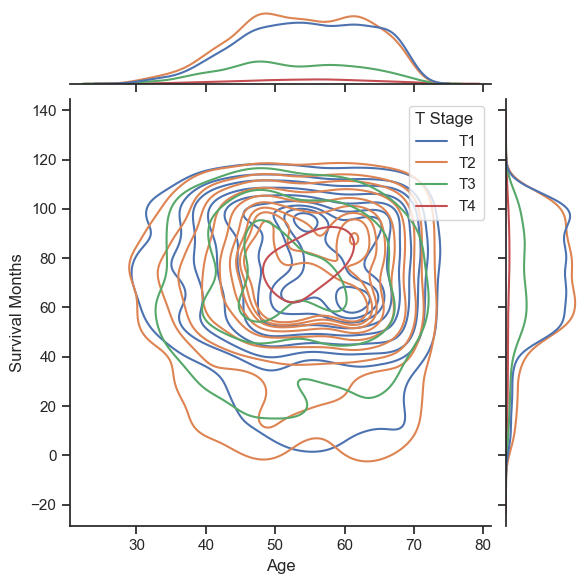

In [24]:
#set the seaborn plot theme style as ticks
sns.set_theme(style="ticks")
#read the data and assigned to d3
d3 = pd.read_csv("Breast_Cancer.csv")
#plotted the jointplot and assigned it to g. labelled x and y axis and hue is given for thr 't Stage' variable in the dataset. 
#"kde" stands for kernel density estimation
#it creates a contour plot showing the estimated probability density of the data
g = sns.jointplot(
    data=d3,
    x="Age", y="Survival Months", hue="T Stage ",kind="kde"
)

I used seaborn plot called as joint kernel density estimate, to study the analyse the density of patients suffering breast cancer reagarding their age, stage and survival month. The T stage represents the severity of the cancer it is represented in different colours to show the severity. T1 is the lowest and severity increases to T4. From the plot we can analyse that most of the patients with T4 stage of cancer fall in the age group of 50-60. They are very less in number. Most of the breast cancer patients have T2 stage breast cancer and  they fall in all age category. The survival months of the patients vary according to their age and stage of the cancer.